In [14]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
from utils import fix_channels
from torchvision.transforms import ToTensor


In [15]:
model = CLIPModel.from_pretrained("patrickjohncyh/fashion-clip")
processor = CLIPProcessor.from_pretrained("patrickjohncyh/fashion-clip")

In [16]:
IMAGE_PATH = "/Users/guybasson/Desktop/sdatta-nlp/photos/japan-wrap-dress.jpg"
texts = ["a japanese dress with yellow flowers", "a summer dress with pink flowers", "a pink bra"]
image = Image.open(IMAGE_PATH)


In [17]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)
print("probs", probs)
for text in texts:
    print("text:", text, end=", ")
    print("prob:", probs[0][texts.index(text)].item())

probs tensor([[5.7598e-01, 4.2402e-01, 2.0079e-10]], grad_fn=<SoftmaxBackward0>)
text a japanese dress with yellow flowers: prob 0.5759807825088501
text a summer dress with pink flowers: prob 0.4240192472934723
text a pink bra: prob 2.0078770590625794e-10


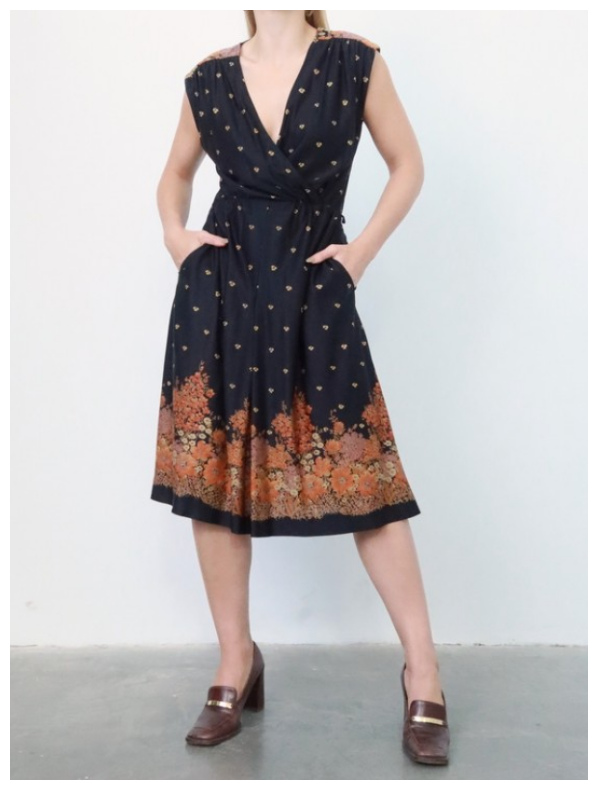

In [18]:
# plot the image
pil_img = Image.open(open(IMAGE_PATH, "rb"))
pil_img = fix_channels(ToTensor()(image))
pil_img = image.resize((600, 800))

plt.figure(figsize=(12,10))
plt.imshow(pil_img)
ax = plt.gca()
plt.axis('off')
plt.show()